Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the data

In [2]:
df = pd.read_csv('train.csv')

Explore the data

In [3]:
df.head()

,productID,model,color,gpu,cpu,ram,harddisk,OS,special_features,price
0,0,Dell Dell Latitude 14 Inches,NaN,"Integrated, NVIDIA GeForce GT 720M",Core i5 / 1.7 GHz,4 GB,500 GB,Windows 8,NaN,180.00
1,1,ASUS ASUS CHROMEBOOK CX9 14 INCHES,STAR BLACK,INTEGRATED,INTEL CORE I7,16 GB,512 GB,CHROME OS,STYLUS,1211.99
2,2,Dell Inspiron 3511 Laptop 15.6 Inches,Black,Integrated,Core i5,32 GB,2000 GB,Windows 10 Home,Wifi & Bluetooth,735.59
3,3,hp 14 Inches,NaN,Unknown,3.7 GHz,4 GB,NaN,Windows 10 Home,Anti-glare,339.00
4,4,Dell Alienware X14 Laptop 14 Inches,Lunar Light,"Integrated, NVIDIA GeForce RTX 3060",Core i7,12 GB,1000 GB,Windows 11 Home,NaN,2086.99


Check data types, missing values, and descriptive statistics

In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   productID         2943 non-null   int64  
 1   model             2943 non-null   object 
 2   color             2311 non-null   object 
 3   gpu               2943 non-null   object 
 4   cpu               2943 non-null   object 
 5   ram               2878 non-null   object 
 6   harddisk          2741 non-null   object 
 7   OS                2911 non-null   object 
 8   special_features  1946 non-null   object 
 9   price             2943 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 230.1+ KB


productID             0
model                 0
color               632
gpu                   0
cpu                   0
ram                  65
harddisk            202
OS                   32
special_features    997
price                 0
dtype: int64

Handle missing values

In [5]:
df['ram'] = df['ram'].str.replace(' MB', '000000').str.replace(' GB', '000000000').astype(float)
df['ram'].fillna(df['ram'].median(), inplace=True)

df['harddisk'] = df['harddisk'].str.replace(' MB', '000000').str.replace(' GB', '000000000').str.replace(' TB', '000000000000').astype(float)
df['harddisk'].fillna(df['harddisk'].median(), inplace=True)


/tmp/ipykernel_7749/1436939663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ram'].fillna(df['ram'].median(), inplace=True)
/tmp/ipykernel_7749/1436939663.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [6]:
df.fillna('Unknown', inplace=True)


Feature encoding: Convert categorical variables like model, color, gpu, cpu, OS, etc., into numeric values using one-hot encoding or label encoding.


In [7]:
df = pd.get_dummies(df, columns=['model', 'color', 'gpu', 'cpu', 'OS', 'special_features'], drop_first=True)


Normalize or scale continuous variables like ram and harddisk if needed.


In [8]:
print(df['ram'].isnull().sum())  # Check if there are missing values in the 'ram' column
print(df['harddisk'].isnull().sum())  # Check for missing values in 'harddisk'

0
0


Feature Exploration:



Correlation matrix: Identify which features are correlated with the target variable (price).


<Axes: >

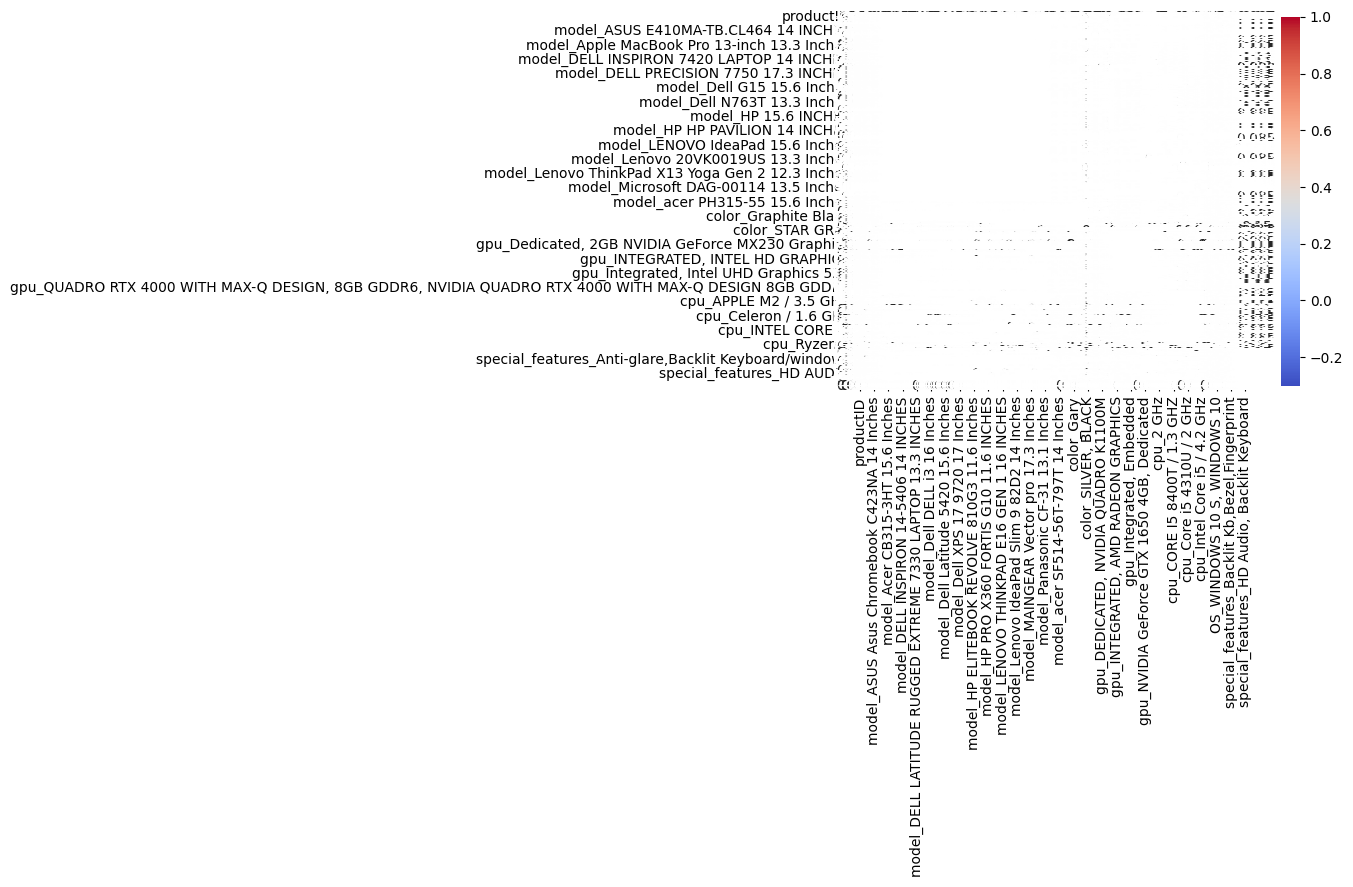

In [9]:
# Select a random subset of the data to speed up correlation computation
df_sample = df.sample(frac=0.1, random_state=42)
sns.heatmap(df_sample.corr(), annot=True, cmap='coolwarm')


Distribution of price: Visualize the price distribution and identify outliers.

<Axes: xlabel='price', ylabel='Count'>

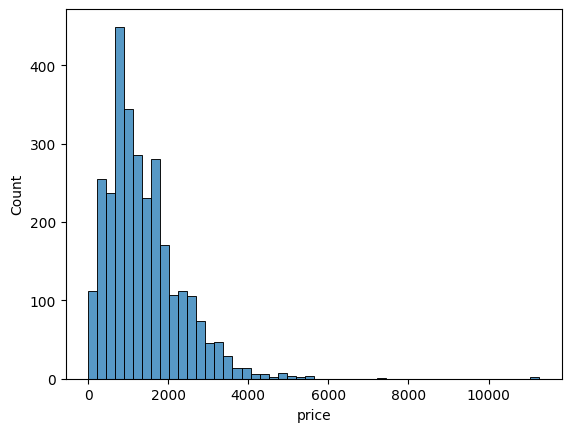

In [10]:
sns.histplot(df['price'], bins=50)


Relationship between features and price: Plot the relationship between price and other features like ram, harddisk, etc.


<Axes: xlabel='ram', ylabel='price'>

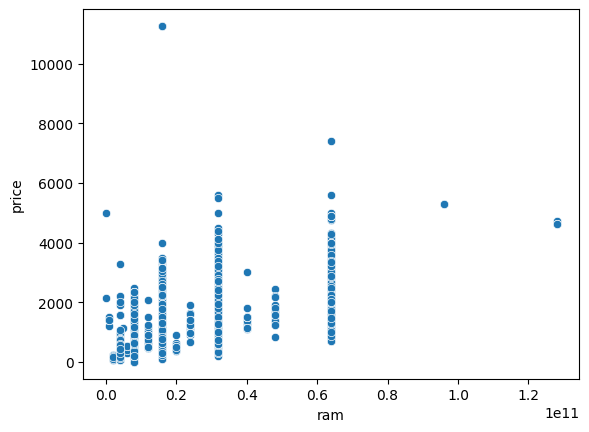

In [11]:
sns.scatterplot(x='ram', y='price', data=df)


Feature Engineering:

Create new features if necessary, such as price per GB of RAM or hard drive size.
Consider removing features with low variance or low correlation with the target variable.

Saving Data using CSV


In [12]:
df.to_csv('cleaned_data.csv', index=False)